### Example: An overdetermined least-squares problem 

Objective: find a solution to the equation
$${\bf G} {\bf m} = {\bf d}$$
with
${\bf G}=
\begin{bmatrix} 
1  & -1 \\ 
2 & -1 \\
1 & 1
\end{bmatrix}
$
and ${\bf d}=\begin{bmatrix}-1\\0\\2.5\end{bmatrix}$

First we import a few libraries for plotting and linear algebra.

In [27]:
using PyPlot  # use plotting functions from matplotlib (matlab-like)
using LinearAlgebra  # a lot of useful matrix-vector functions

We define the matrix and the vector using (Matlab-like) codes

In [34]:
G = [1 -1;2 -1;1 1];
d = [-1; 0; 2.5];

To have a look at the equations, we rearrange every ($i$th) equation:
$$G_{i1}\cdot m_1 + G_{i2} \cdot m_2 = d_i$$
into 
$$m_2 = \frac{d_i - G_{i1}\cdot m_1}{G_{i2}}$$
and plot the function $m_2(m_1)$ in a certain range:

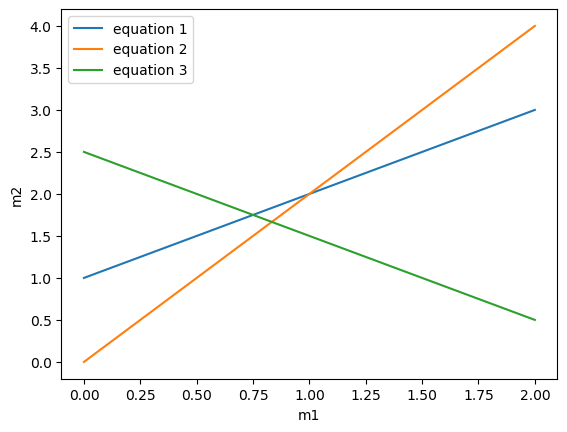

In [39]:
xx = [0; 2]
f=figure()
for i in 1:3
    yy = (d[i] .- G[i, 1] * xx) ./ G[i,2]
    plot(xx, yy, label="equation $i") 
end
legend()
xlabel("m1")
ylabel("m2");

The three lines (equations) are almost intersecting each other at about (1, 1.5).

Now we take a close look into the region of interest.
Additionally we consider an error $e$ and plot error bounds by filling a region.

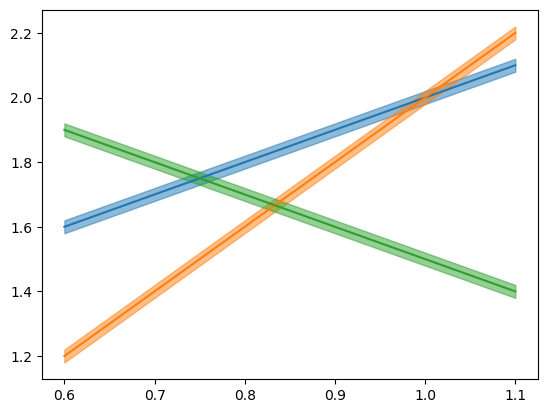

In [42]:
xx = [0.6; 1.1]
e = 0.02
f=figure()
for i in 1:3
    yy = (d[i] .- G[i, 1] * xx) ./ G[i,2]
    j = i - 1
    fill_between(xx, yy.-e, yy.+e, color="C$j", alpha=0.5)
    plot(xx, yy, linestyle="-", color="C$j")
end

Apparently there is no solution that fits all equations.

**Question 1:**: How big has the error to be so that there is a unique solution?

**Task 1:**: Modify $e$ by hand so that the areas meet.

Alternative: make an interactive plot using the `Interact` module.

In [43]:
using Interact  # interactive plots
xx = [0.6; 1.1]
f=figure()
@manipulate for e = 0:0.01:0.1; withfig(f) do
        print(e)
        for i = 1:3
            yy = (d[i] .- G[i, 1] * xx) ./ G[i,2]
            j = i - 1
            fill_between(xx, yy.-e, yy.+e, color="C$j", alpha=0.5)
            # plot(xx, yy, linestyle="-", color="C$j")
        end
    end
end

0.05

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["e"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 11,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\halbm\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\halbm\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\halbm\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\halbm\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\halbm\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000014d736b0, Task (runnable) @0x0000000014d736b0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"2791800416055680356\",\"id\":\"ob_

0.040.030.020.010.020.030.040.050.060.070.080.090.1

**Question 2:**: What if the data have different errors?

**Task 2:**: Make $e$ a vector (like $b$) and play around.

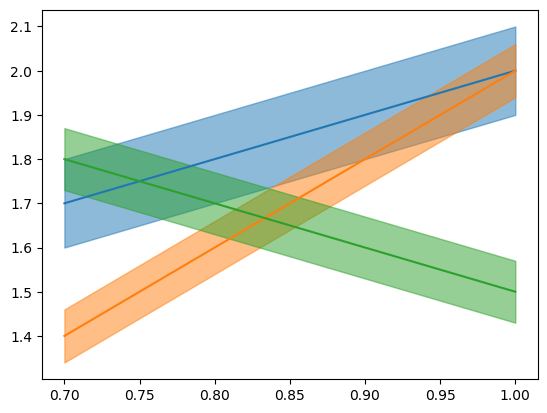

In [46]:
xx = [0.7; 1.0]  # zoom in even a bit more
e = [0.1;0.06;0.07]
f=figure()
for i in 1:3
    yy = (d[i] .- G[i, 1] * xx) ./ G[i,2]
    j = i - 1
    fill_between(xx, yy.-e[i], yy.+e[i], color="C$j", alpha=0.5)
    plot(xx, yy, linestyle="-", color="C$j")
end

### Least-squares solution
We now want to solve the system in the least-squares sense, i.e.
by solving 
$${\bf m} = \left({\bf G}^T {\bf G}\right)^{-1} \cdot {\bf G}^T {\bf d}$$

In [52]:
GT = transpose(G)  # in Matlab G.T
m = inv(GT * G) * (GT * d)

2-element Array{Float64,1}:
 0.8214285714285714
 1.7142857142857142

We also try out the backslash (\) that we already know from Matlab:

In [53]:
m = G\d  # obviously doing the right thing

2-element Array{Float64,1}:
 0.8214285714285718
 1.7142857142857142

Tasks: 
* Plot the model along with the curves!
* Display the residual vector and its norm (RMS)

3-element Array{Float64,1}:
 -0.10714285714285765
  0.07142857142857051
 -0.03571428571428603

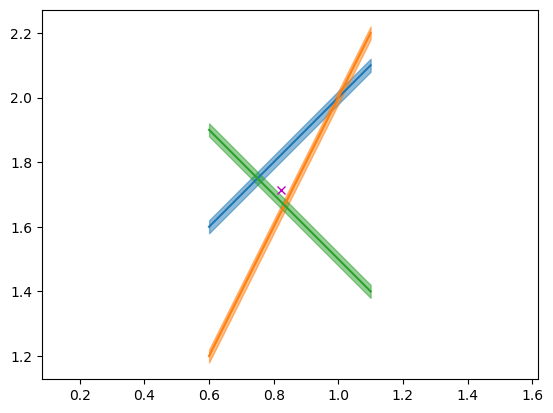

0.07715167498104596

In [62]:
xx = [0.6; 1.1]
e = 0.02
f=figure()
for i in 1:3
    yy = (d[i] .- G[i, 1] * xx) ./ G[i,2]
    j = i - 1
    fill_between(xx, yy.-e, yy.+e, color="C$j", alpha=0.5)
    plot(xx, yy, linestyle="-", color="C$j")
end
plot(m[1], m[2], "mx")
axis("equal")  # in Matlab also axis equal
r = d - G*m  # residual
display(r)
print(sqrt(sum(r.^2)/length(r)))

### Model and Data resolution matrices
We compute the model resolution matrix using the generalized inverse

$${\bf G}^\dagger=({\bf G}^T {\bf G})^{-1} {\bf G}^T$$

by

$${\bf R^M} = {\bf G}^\dagger{\bf G} = ({\bf G}^T {\bf G})^{-1} {\bf G}^T {\bf G}$$

and 
$${\bf R^D} = {\bf G}{\bf G}^\dagger = {\bf G}({\bf G}^T {\bf G})^{-1} {\bf G}^T$$

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

3-element Array{Float64,1}:
 0.3571428571428571
 0.7142857142857142
 0.9285714285714285

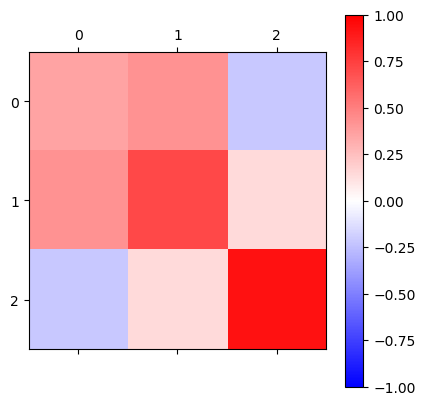

In [14]:
Ginv = inv(GT*G)*GT
RM = Ginv * G
display(RM)  # fully resolved (over-determined)
RD = G * Ginv
matshow(RD)
set_cmap("bwr")
clim([-1, 1])
colorbar();
display(diag(RD))

Q: Whats the interpretation of it?
* Equation 3 (green line) is "stronger" (more independent) than the others because it is "more perpendicular"
* Equations 1+2 are strongly correlating

### Error-weighting
We now introduce error-weighting using the predefined error $e$ by solving

$$ {\bf\hat G}{\bf m} = {\bf\hat d} $$

with ${\bf\hat G}={\bf D}{\bf G}$ and ${\bf\hat d}={\bf D}{\bf d}$, where

$${\bf D}=\mbox{diag}(1/\epsilon_i)=
\begin{bmatrix}
1/\epsilon_1 & 0     & \ldots & 0 \\
0     & 1/\epsilon_2 & \ldots      & 0 \\
\ldots & \ldots & \ddots & \vdots\\
0 & 0 & \ldots & 1/\epsilon_N
\end{bmatrix}
$$

In [26]:
D = diagm(1.0./e)  # create a diagonal matrix
DG = D * G  # error-weighted forward matrix
dd = D * d  # error-weighted data
DGT = transpose(DG)
m1 = inv(DGT * DG) * (DGT * dd) # solve error-weighted normal eq.
display(m1)
print(DG \ (D*d))  # try the backslash: obviously the same

2-element Array{Float64,1}:
 0.8292682926829269
 1.6829268292682928

[0.8292682926829266, 1.6829268292682928]

Question: How does the model change by changing the errors?

Task: Plot the equal-error solution along with two alternative errors.

### Singular value decomposition
The matrix $\bf A$ is decomposed into data and model basis vectors ($\bf U$ and $\bf V$), weighted by singular values in the vector $\bf s$.
$$
{\bf A}= {\bf U} \cdot \mbox{diag}({\bf s}) \cdot {\bf V}^T
$$

In [21]:
SVD = svd(G)
display(SVD.S)
display(SVD.U)
display(SVD.V)

2-element Array{Float64,1}:
 2.6457513110645907
 1.414213562373095

3×2 Array{Float64,2}:
 -0.507093   0.316228
 -0.845154  -1.29837e-16
 -0.169031  -0.948683

2×2 Adjoint{Float64,Array{Float64,2}}:
 -0.894427  -0.447214
  0.447214  -0.894427

In [23]:
# a very simple matrix
B = [1 0.1;1 -0.1]
F = svd(B)
display(F.S)
display(F.V)
display(F.U)

2-element Array{Float64,1}:
 1.4142135623730951
 0.1414213562373095

2×2 Adjoint{Float64,Array{Float64,2}}:
 -1.0  -0.0
 -0.0  -1.0

2×2 Array{Float64,2}:
 -0.707107  -0.707107
 -0.707107   0.707107